In [4]:
%load_ext autoreload
%autoreload 2

# Analyse small-scale run to make sure sensitivity & precision are ok

# Imports

In [42]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from synbio_morpher.utils.results.analytics.naming import get_true_interaction_cols


In [6]:
fn = '../data/ensemble_mutation_effect_analysis/2024_11_11_135219/summarise_simulation/tabulated_mutation_info.csv'
df = pd.read_csv(fn)
df

,circuit_name,mutation_name,mutation_num,mutation_type,mutation_positions,path_to_template_circuit,index,sample_num,name,interacting,...,initial_steady_states,max_amount,min_amount,overshoot,RMSE,steady_states,response_time_wrt_species-6,precision_wrt_species-6,sensitivity_wrt_species-6,sample_name
0,toy_mRNA_circuit_0,ref_circuit,0,[],[],./data/ensemble_mutation_effect_analysis/2024_...,0.0,9.0,toy_mRNA_circuit_0,[],...,199.73235,400.0,199.73235,0.802002,0.000000,399.19800,0.0,1.004021,1.000000,RNA_0
1,toy_mRNA_circuit_0,ref_circuit,0,[],[],./data/ensemble_mutation_effect_analysis/2024_...,0.0,9.0,toy_mRNA_circuit_0,[],...,199.73235,200.0,199.66568,0.000000,0.000000,199.66568,0.0,3004.060800,0.000333,RNA_1
2,toy_mRNA_circuit_0,ref_circuit,0,[],[],./data/ensemble_mutation_effect_analysis/2024_...,0.0,9.0,toy_mRNA_circuit_0,[],...,199.73235,200.0,199.66568,0.000000,0.000000,199.66568,0.0,3004.060800,0.000333,RNA_2
3,toy_mRNA_circuit_0,RNA_0_m1-0,1,[3],[18],./data/ensemble_mutation_effect_analysis/2024_...,0.0,9.0,toy_mRNA_circuit_0,[],...,199.73235,400.0,199.73235,0.802002,0.000000,399.19800,0.0,1.004021,1.000000,RNA_0
4,toy_mRNA_circuit_0,RNA_0_m1-0,1,[3],[18],./data/ensemble_mutation_effect_analysis/2024_...,0.0,9.0,toy_mRNA_circuit_0,[],...,199.73235,200.0,199.66568,0.000000,0.000000,199.66568,0.0,3004.060800,0.000333,RNA_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,toy_mRNA_circuit_99,RNA_2_m1-0,1,[8],[9],./data/ensemble_mutation_effect_analysis/2024_...,4.0,9.0,toy_mRNA_circuit_99,[],...,199.73235,200.0,199.66568,0.000000,0.000000,199.66568,0.0,3004.060800,0.000333,RNA_1
6296,toy_mRNA_circuit_99,RNA_2_m1-0,1,[8],[9],./data/ensemble_mutation_effect_analysis/2024_...,4.0,9.0,toy_mRNA_circuit_99,[],...,199.73235,200.0,199.66568,0.000000,0.000000,199.66568,0.0,3004.060800,0.000333,RNA_2
6297,toy_mRNA_circuit_99,RNA_2_m1-1,1,[2],[14],./data/ensemble_mutation_effect_analysis/2024_...,5.0,9.0,toy_mRNA_circuit_99,[[1 2]],...,199.74307,400.0,199.74307,0.780518,0.021447,399.21948,0.0,1.003913,1.000000,RNA_0
6298,toy_mRNA_circuit_99,RNA_2_m1-1,1,[2],[14],./data/ensemble_mutation_effect_analysis/2024_...,5.0,9.0,toy_mRNA_circuit_99,[[1 2]],...,192.17154,200.0,192.11177,0.000000,7.546352,192.11177,0.0,3223.526400,0.000310,RNA_1


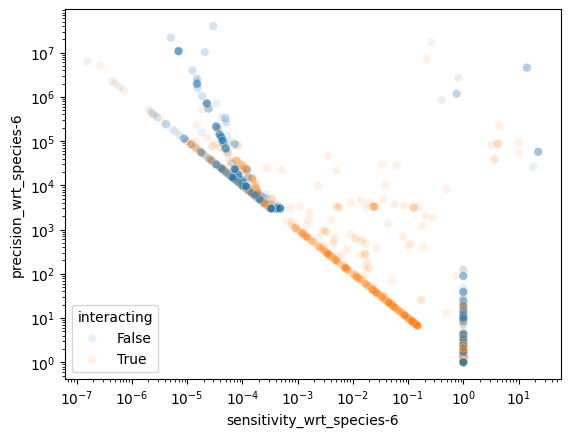

In [36]:
import matplotlib as mpl

filt_null = df['interacting'] != '[]'
sns.scatterplot(df, x='sensitivity_wrt_species-6', y='precision_wrt_species-6', hue=filt_null, alpha=0.1)
# ax = plt.hist2d(x=np.log10(df['sensitivity_wrt_species-6']),
#            y=np.log10(df['precision_wrt_species-6']),
#            bins=50,
#            norm=mpl.colors.LogNorm())  # , cmap=mpl.cm.gray)
plt.xscale('log')
plt.yscale('log')

In [54]:
filt = filt_null & (df['precision_wrt_species-6'] > 1e4) & (df['sensitivity_wrt_species-6'] > 1)

dir_circs = os.path.join(os.path.dirname(os.path.dirname(fn)), 'mutation_effect_on_interactions_signal')

for c_name in df[filt]['circuit_name'].unique():  # [get_true_interaction_cols(df, 'energies')]
    dir_circ = os.path.join(dir_circs, c_name)
    fn_signal = os.path.join(dir_circ, 'signal_data.csv')
    fn_steady = os.path.join(dir_circ, 'steady_states_data.csv')
    d = pd.read_csv(fn_signal)
    # d = pd.read_csv(fn_steady)
    print(d)
    # plt.plot(d['time'], d['signal'], label=c_name)
    

     0.06695136  0.006061553  0.06395002   86.46631   8.956481  0.06108317  \
0      0.000000     0.000000    0.000000   0.000000   0.000000    0.000000   
1      0.267391     0.078695    0.116211  28.101511  26.273384    0.050506   
2      0.267424     0.058229    0.111916  40.166286  32.694416    0.046836   
3      0.267438     0.048171    0.111650  47.475570  33.092530    0.046611   
4      0.267446     0.042187    0.112668  52.705097  31.570078    0.047464   
..          ...          ...         ...        ...        ...         ...   
494    0.267447     0.012115    0.127773  86.464200   8.953471    0.061043   
495    0.267447     0.012115    0.127773  86.464200   8.953471    0.061043   
496    0.267447     0.012115    0.127773  86.464200   8.953471    0.061043   
497    0.267447     0.012115    0.127773  86.464200   8.953471    0.061043   
498    0.267447     0.012115    0.127773  86.464200   8.953471    0.061043   

     199.78949    18.08832   190.8331  
0    400.00000  200.000

In [45]:
os.path.dirname(os.path.dirname(fn))

'../data/ensemble_mutation_effect_analysis/2024_11_11_135219'